In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [2]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [5]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], shape=(569, 30)), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,

In [6]:
# loading the data to a data frame
df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [7]:
# print the first 5 rows of the dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# adding the 'target' column to the data frame
df['label'] = breast_cancer_dataset.target

In [10]:
# print last 5 rows of the dataframe
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [12]:
# number of rows and columns in the dataset
df.shape

(569, 31)

In [14]:
# checking for missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [15]:
# checking the distribution of Target Varibale
df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

1 --> Benign

0 --> Malignant

In [16]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [17]:
X = df.drop(columns='label', axis=1)
Y = df['label']

In [19]:
# Splitting the data into training data & Testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [26]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [27]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


**Building the Neural Network**


In [29]:
# importing tensorflow and Keras
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [30]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),  # 30 input layers for 30 features
                          keras.layers.Dense(20, activation='relu'), 
                          keras.layers.Dense(2, activation='sigmoid') # 2 output layers for 2 labels ( 0 and 1)
])

/Users/akashdixit/Desktop/Coding/anaconda3/envs/amazon_pricing/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
# training the Neural Network

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4670 - loss: 0.7700 - val_accuracy: 0.7174 - val_loss: 0.5859
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8044 - loss: 0.5463 - val_accuracy: 0.8913 - val_loss: 0.4130
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8851 - loss: 0.4105 - val_accuracy: 0.9565 - val_loss: 0.3100
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9046 - loss: 0.3278 - val_accuracy: 0.9565 - val_loss: 0.2498
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9071 - loss: 0.2750 - val_accuracy: 0.9565 - val_loss: 0.2122
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9144 - loss: 0.2388 - val_accuracy: 0.9565 - val_loss: 0.1861
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9242 - loss: 0.2124 - val_accuracy: 0.9565 - val_loss: 0.1672
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9315 - loss: 0.1916 - val_accuracy: 0.9565 - val_loss

Visualizing accuracy and loss

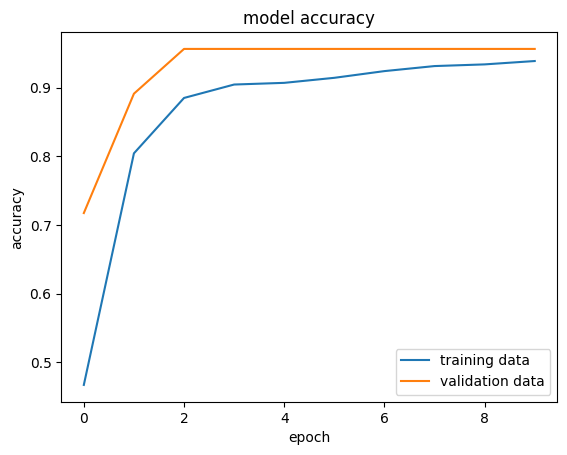

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

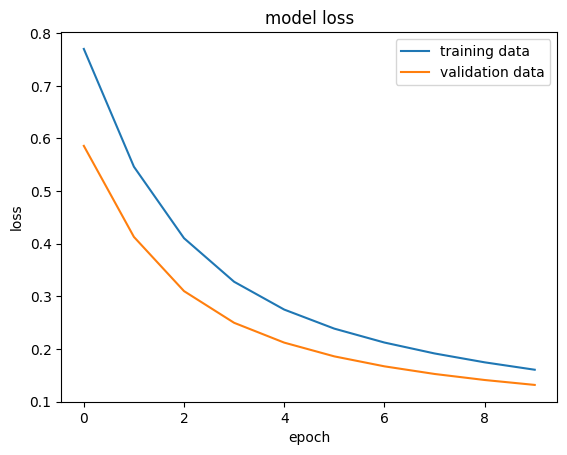

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')


Accuracy of the model on test data

In [36]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9474 - loss: 0.1661
0.9473684430122375


In [37]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [38]:
Y_pred = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [39]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.40526205 0.61173767]


In [40]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [41]:
print(Y_pred)

[[0.40526205 0.61173767]
 [0.53022647 0.605354  ]
 [0.2821549  0.93840784]
 [0.9999867  0.652324  ]
 [0.5040098  0.5608236 ]
 [0.99765956 0.7110301 ]
 [0.41302806 0.72923887]
 [0.11270911 0.9370214 ]
 [0.21217099 0.8387042 ]
 [0.21884346 0.8713345 ]
 [0.59556305 0.71172994]
 [0.3382661  0.8712984 ]
 [0.4617452  0.8209454 ]
 [0.374996   0.8051519 ]
 [0.28675294 0.893884  ]
 [0.9795906  0.65779567]
 [0.25249848 0.90743786]
 [0.24365424 0.8095636 ]
 [0.21552928 0.80899096]
 [0.99633247 0.59937114]
 [0.65034163 0.23284999]
 [0.19413227 0.8832729 ]
 [0.20654333 0.8187208 ]
 [0.1561872  0.93218666]
 [0.3219805  0.71478665]
 [0.99154747 0.5823931 ]
 [0.32400122 0.81619006]
 [0.33392817 0.58496004]
 [0.9895035  0.58769685]
 [0.9910338  0.67044854]
 [0.284758   0.8538466 ]
 [0.17827557 0.82596314]
 [0.1651466  0.8301144 ]
 [0.9998838  0.81566334]
 [0.9963346  0.6153529 ]
 [0.3477534  0.60163784]
 [0.14940287 0.9151257 ]
 [0.2692483  0.75563455]
 [0.23269069 0.945572  ]
 [0.27365267 0.8513963 ]


model.predict() gives the prediction probability of each class for that data point

In [42]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [43]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1)

Building the predictive system

In [44]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[1.        0.9955123]]
[np.int64(0)]
The tumor is Malignant
